In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('full_no_repo_dups.pkl')

In [4]:
df.head()

,nb_id,repo_id,has_author,jupyter_prop,output_cell_prop,num_contrib,image_prop,is_education,has_comments,num_commits,non_exec_prop,exec_inorder,exec_skips,has_error,has_export,num_functions,has_test,has_param,has_reqtext,num_stars
79,106,165198456,False,0.930911,0.363636,1.0,0.000000,True,True,3.0,0.545455,0.75,4.500000,False,False,2.0,False,False,False,1.0
81,108,165197188,False,1.000000,0.560000,1.0,0.000000,True,True,1.0,0.000000,1.00,1.913043,False,False,6.0,False,False,False,1.0
88,116,165201963,False,1.000000,0.666667,1.0,0.187500,True,True,1.0,0.041667,1.00,1.227273,False,False,8.0,False,False,False,0.0
89,117,165200414,False,1.000000,0.000000,1.0,0.000000,True,True,1.0,1.000000,1.00,0.000000,False,True,0.0,False,False,False,0.0
92,120,165200582,False,1.000000,0.545455,0.0,0.833333,False,True,2.0,0.000000,1.00,1.222222,False,True,0.0,False,False,False,0.0


In [5]:
len(df)

18178

In [7]:
quant_vars = [df.columns[i] for i in [3, 4, 5, 6, 9, 10, 11, 12, 15, 19]]
quant_vars

['jupyter_prop',
 'output_cell_prop',
 'num_contrib',
 'image_prop',
 'num_commits',
 'non_exec_prop',
 'exec_inorder',
 'exec_skips',
 'num_functions',
 'num_stars']

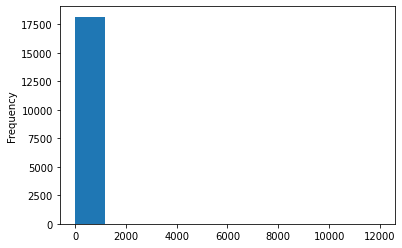

In [125]:
df['num_stars'].plot(kind = 'hist')

In [134]:
to_filter = set()
outliers = df.nsmallest(2000, ['jupyter_prop'], keep='all')
to_filter.update(outliers['nb_id'])

In [135]:
outliers = df.nlargest(100, ['num_contrib'], keep='all')
to_filter.update(outliers['nb_id'])

In [136]:
outliers = df.nlargest(250, ['num_commits'], keep='all')
to_filter.update(outliers['nb_id'])

In [137]:
outliers = df.nsmallest(250, ['exec_inorder'], keep='all')
to_filter.update(outliers['nb_id'])

In [138]:
outliers = df.nlargest(250, ['exec_skips'], keep='all')
to_filter.update(outliers['nb_id'])

In [139]:
outliers = df.nlargest(100, ['num_functions'], keep='all')
to_filter.update(outliers['nb_id'])

In [144]:
outliers = df.nlargest(500, ['num_stars'], keep='all')
to_filter.update(outliers['nb_id'])

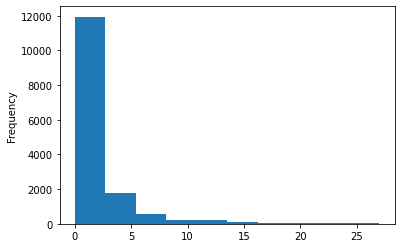

In [156]:
new_df = df[~df['nb_id'].isin(list(to_filter))]
new_df['num_stars'].plot(kind = 'hist')

In [157]:
len(new_df)

14999

In [159]:
new_df.to_pickle('full_reduced_outliers.pkl')
new_df.to_csv('csv-files/full_reduced_outliers.csv')